In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import math

ModuleNotFoundError: No module named 'numpy'

## Part 1: Discrete Time Fourier Transform (DTFT)


### Assignment 1a:
1. Complete the ``dtft_rect_win()`` function
2. Complete the ``plot_dtft()`` function
3. Use ``dtft_rect_win()`` and ``plot_dtft()`` to generate and plot the DTFT of a rectangular window with $N=20$ for at least $K=501$ values. Display the DTFT in linear and dB scale.

In [ ]:
def dtft_rect_win(N, K):
    """
    Computes the DTFT of a rectangular window
    
    :param N: int
        length of the window (number of samples)
    :param K: int
        number of frequency points for computing the DTFT. K should be odd or otherwise rounded
        to the next largest odd number. K should be used to genrate a frequency array containing
        K equally spaced samples from -pi to pi.
    :return: np.ndarray
        DTFT of a rectangular window evaluated at K equally spaced frequencies from -pi to pi.
    """

    # if K is even, set K to be the next largest odd number
    if K % 2 == 0:
        K += 1

    # array of frequencies for which the DTFT is evaluated
    omega = np.linspace(-np.pi, np.pi, K)
    W_rect = []

    # compute DTFT values (Equation 7)
    for i in range(len(omega)):
        w = omega[i]
        if ((w == 0) or (w == abs(2*np.pi))):
            W_rect.append(N)
        else:
            num = 1 - np.exp(-1j*omega[i]*N)
            den = 1 - np.exp(-1j*omega[i])
            W_rect.append(num/den)
    return W_rect

def plot_dtft(X, scale='dB', color='Blue'):
    """
    Plots the magnitude of the DTFT from -pi to pi
    
    :param X: np.ndarray
        DTFT from -pi to pi evaluated at K = len(X) equally spaced frequencies.
    :param scale: str
        'dB' or 'lin' to plot in dB or linear scale, respectively.
    :param color: str
        color of the DTFT. None (default) corresponds to color 'blue'
    """

    # frequency array
    k = len(X)
    w = np.linspace(-np.pi, np.pi, k)
    
    # plot in dB scale
    if scale == 'dB':
        omega = 20*np.log10(np.abs(X))
        plt.plot(w, omega)
        plt.title('logarithmic magnitude')
        plt.xlabel('omega')
        plt.ylabel('magnitude (dB)')
        
    # plot in linear scale
    elif scale == 'lin':
        omega = np.abs(X)
        plt.plot(w, omega)
        plt.title('linear magnitude')
        plt.xlabel('omega')
        plt.ylabel('magnitude (lin)')

    plt.grid()

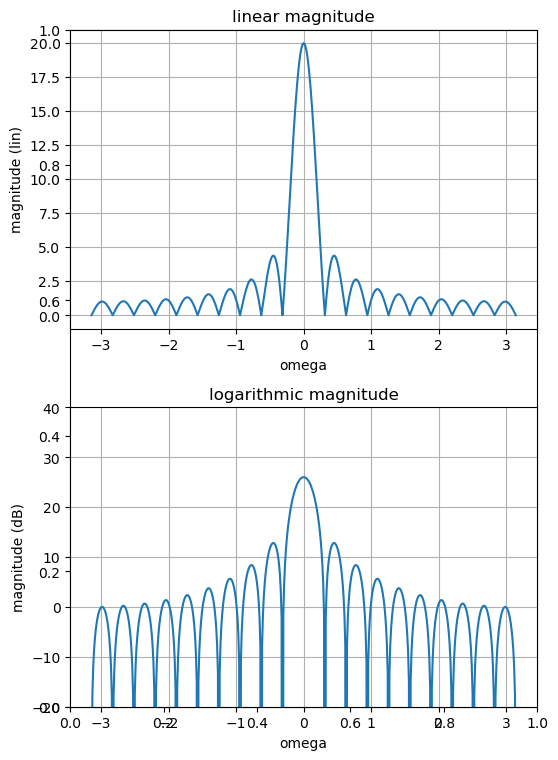

In [ ]:
N = 20 #length of the window
K = 501 #number of frequency samples

# TODO: DTFT of rectangular window
dtft_x = dtft_rect_win(N, K)

# plot DTFT of rectangular window in linear scale
fig, ax = plt.subplots(figsize=(6, 8))
ax1 = fig.add_subplot(211)
plot_dtft(dtft_x, 'lin', 'Blue')

# plot DTFT of rectangular window in dB scale
ax2 = fig.add_subplot(212)
plot_dtft(dtft_x, 'dB', 'Blue')
plt.ylim([-N, 2*N])

fig.tight_layout()
plt.show()

### Assignment 1b

1. Complete the ``dtft()`` function.
2. Compute the DTFT of 2 sinusoids with frequencies:
    * f1 = 400 Hz
    * f2 = 525 Hz
  
  for at least 501 frequency values. You can set the amplitude to 1 for both signals. The sampling frequency is fs = 1000 Hz. Both sinusoids are truncated after 20 samples (i.e, multiplied by a rectangular window with length 20)

In [ ]:
def dtft(x, K):
    """
    Computes the DTFT of an arbitrary signal x
    
    :param x: np.ndarray
        discrete time signal
    :param K: int
        number of frequency points for computing the DTFT. K should be odd or otherwise rounded
        to the next largest odd number. K should be used to generate a frequency array containing
        K equally spaced samples from -pi to pi.
    :return: np.ndarray
        DTFT of x evaluated at K equally spaced frequencies from -pi to pi.
    """

    # if K is even, set K to be the next largest odd number
    if K % 2 == 0:
        K += 1

    # array of frequencies for which the DTFT is evaluated
    omega = np.linspace(-np.pi, np.pi, K)

    # TODO: DTFT of x according to definition (Equation 5)
    # TODO: return DTFT
    W_rect = []
    for i in range(K):
        w = omega[i]
        total = 0+0j
        for n in range(len(x)):
            total += x[n] * np.exp(-1j * w * n)
        W_rect.append(total)
    return W_rect

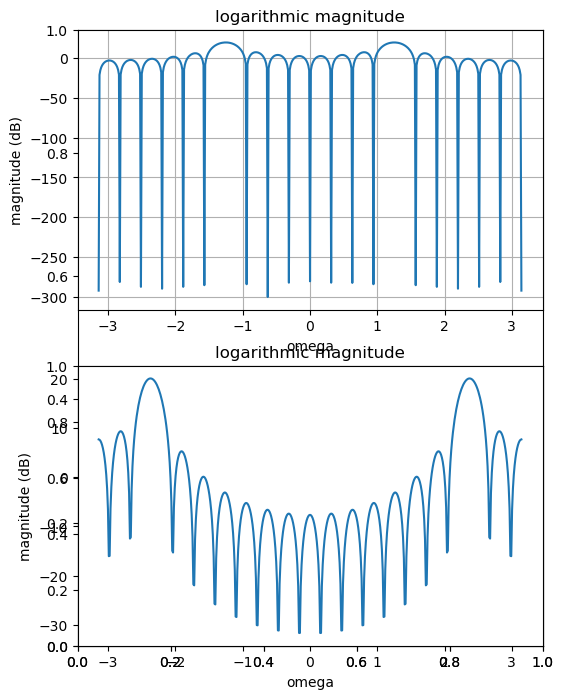

In [ ]:
fs = 1000 # sampling frequency in Hz
f1 = 200 # frequency of 1st sin
f2 = 375 # frequency of 2nd sin
N = 20 # number of samples


t = np.linspace(0, ((N-1)/fs), N)

# two sinusoidal signals
x1 = np.sin(2*np.pi*f1*t)
x2 = np.sin(2*np.pi*f2*t)

# TODO: compute their DTFTs
plot1 = dtft(x1, K)
plot2 = dtft(x2, K)

# TODO: plot DTFTs of x1 and x2 in dB scale
fig,ax = plt.subplots(figsize=(6,8))
fig.add_subplot(211)
plot_dtft(plot1, 'dB')

fig.add_subplot(212)
fig.add_subplot(212)
plot_dtft(plot2, 'dB')

plt.grid()
plt.show()

**Discussion:**  Determine expressions for $X_1\left(\mathrm{e}^{j\omega}\right)$ and $X_2\left(\mathrm{e}^{j\omega}\right)$ (the DTFTs of the non-truncated signals). Compare those expressions with the DTFTs of the truncated sines. Briefly describe the effects of the truncation (i.e., windowing with a rectangular window) on the DTFTs.

**Solution:**

## Part 2: Discrete Fourier Transform (DFT)


### Assignment 2:
1. Complete the ``dft()`` function
2. Complete the ``plot_dft()`` function
3. Compute the DFTs of $x_1[n]$ and $x_2[n]$ from Assignment~1b and plot them on top of their DTFTs.

In [ ]:
def dft(x):
    """
    :param x: np.ndarray
        DT signal
    :return: np.ndarray
        DFT of discrete time signal
    """

    # TODO: compute the DFT of x
    
    N = len(x)
    
    w = scipy.linalg.dft(N)
    
    x_k = np.matmul(w, x)
    
    return x_k

def plot_dft(X, shift=True, scale='dB'):
    """
    Creates a stem plot of the DFT that can be overlaid with a DTFT plot. That is the frequency axis should cover a range of [-pi, pi) (shift=True) or [0, 2pi) (shift=False)

    :param X: np.ndarray
        DFT array for a range of [0, 2pi)
    :param shift: bool
        whether the DFT should be shifted to the range [-pi, pi) (instead of [0, 2pi), which is default)
    :param scale: str
        'dB' or 'lin' to plot in dB or linear scale, respectively.
    """
    omega_k = np.linspace(-np.pi, np.pi, len(X))
    if shift:
        # Shift DFT to range [-pi, pi)
        np.fft.fftshift(X)
    else:
        # DTFT does not have to be shifted
        omega_k = np.linspace(0, 2*np.pi, len(X))

    if scale == 'dB':
        # TODO: stem plot of magnitude in dB scale
        x_db = 20 * np.log(np.abs(X))
        plt.title('Logarithmic Magnitude')
        plt.ylabel('magnitude (dB)')
        plt.xlabel('omega')
        plt.plot(omega_k, x_db)
    elif scale == 'lin':
        # TODO: stem plot of magnitude in linear scale
        plt.title('linear magnitude')
        plt.ylabel('magnitude (lin)')
        plt.xlabel('omega')
        plt.plot(omega_k, X)


Plot the DFT of of x1 and x2 on top of their DTFTs

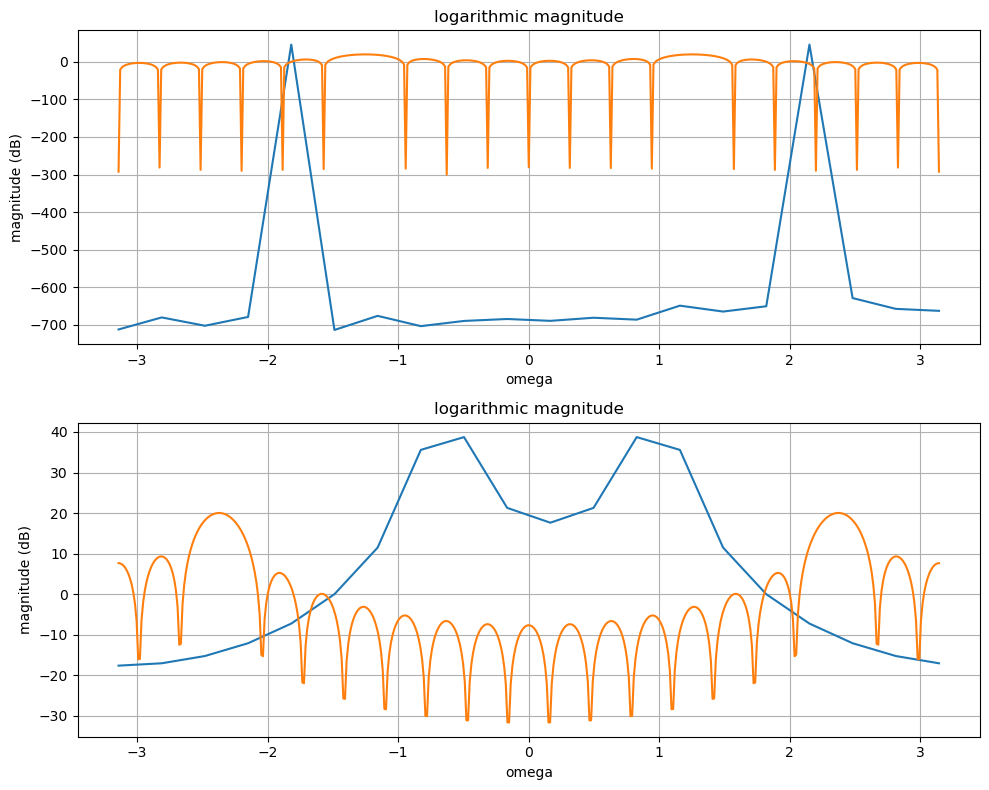

In [ ]:
# TODO: compute DFTs of x1 and x2
N = 20
n = np.arange(0,N)
x1 = np.sin(2*np.pi*(f1/fs)*n)
x2 = np.sin(2*np.pi*(f2/fs)*n)

x1_dft = dft(x1)
x2_dft = dft(x2)


# TODO: plot DTFT and DFT of x1 in dB scale
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(211)
plot_dft(x1_dft)
plot_dtft(plot1, 'dB')


# TODO: plot DTFT and DFT of x2 in dB scale
plt.subplot(212)
plot_dft(x2_dft)
plot_dtft(plot2, 'dB')

fig.tight_layout()
plt.show()

**Discussion:** Briefly describe how the DFT of $x_1[n]$ differs from the DFT of $x_2[n]$. How do the DFTs compare to the expression you got for  $X_1\left(\mathrm{e}^{j\omega}\right)$ and $X_2\left(\mathrm{e}^{j\omega}\right)$, i.e., the DTFTs of the non-truncated signals?

**Solution:**

The DFT of x1 has more distinct peaks at around -2 and 2 while the DFT for x2 has less defined peaks centered closer to the middle. The DFTs are much less detailed and much more smoothed out than the DTFTs. The DTFTs also have their peaks spaced slightly different than the DFTs, but the general shape is still the same.

 ## Part 3: Fast Fourier Transform (FFT)

As described in the lab instructions, the ``FFT`` algorithm can be implemented as follows:
- **Step 1**: Check if the length of the signal is a power of 2 and print out error message if not.
- **Step 2**: Define the base case for a particular value of $N$ (e.g., $N=32$) where the regular ``DFT`` is computed and returned if the length of the signal is equal to that lower threshold for $N$.
- **Step 3**: Use Algorithm 1 below to recursively call the FFT.


---
#### Algorithm 1: FFT recursive calls
---
  &nbsp;&nbsp; **Input**: $x[n]$

  &nbsp;&nbsp; **Do**:

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_e\gets$ all the values of $x[n]$ with even indices starting from zero

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_o\gets$ all the values of $x[n]$ with odd indices starting from one

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_e\gets \texttt{FFT}(x_e)$

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_o\gets \texttt{FFT}(x_o)$

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\texttt{factor}\gets e^{-j2\pi k/N}$

  &nbsp;&nbsp;**return** $X_e+\texttt{factor}\cdot X_o$

---

### Assignment 3:
1. Implement the above algorithm by completing the  ``fft()`` funtion.
2. Test it out on the test signal defined in the starter code.
Compare the output to the following image:
<figure class="image">
  <img src="./figs/1.png" alt="drawing" width="350">
  <figcaption>Expected Result in Obtaining the Magnitude Spectrum for the Test Signal</figcaption>
</figure>

3. In a new block use the ``time.time()`` function to find how long it takes to find the DFT using your implementation of ``dft()`` and your implementation of ``fft()`` and compare the two. Below is an example on how to use the ``time.time()`` function.

```
    a = time.time()
    print(a)
```


In [ ]:
def fft(x):
    """
    Recursive Cooley-Tukey FFT
    :param x: np.ndarray
        DT signal
    :return: np.ndarray
        FFT of discrete time signal
    """

    N =  len(x)# obtain the size of the signal (current problem size)
    
    # the length of the input must be a power of 2
    if (math.ceil(math.log2(N)) != math.floor(math.log2(N))):
        raise ValueError("size of x must be a power of 2")


    elif N <= 32:  # this cutoff should be optimized
        return  dft(x)
    else:
        x_e = np.zeros(int(len(x)/2))
        x_o = np.zeros(int(len(x)/2))
        j = 0
        n = 0
        for i in range(len(x)-1):
            if (i%2 == 0):
                x_e[j] = x[i]
                j+=1
            else:
                x_o[n] = x[i]
                n+=1  
        X_even = fft(x_e)
        X_odd =  fft(x_o)
        k = np.arange(0, N)
        factor =  np.exp((-j * 2 * np.pi * k) / N)
        return np.concatenate([X_even + factor[:N//2] * X_odd,
                               X_even + factor[N//2:] * X_odd])

DFT time: 7.974475383758545 seconds


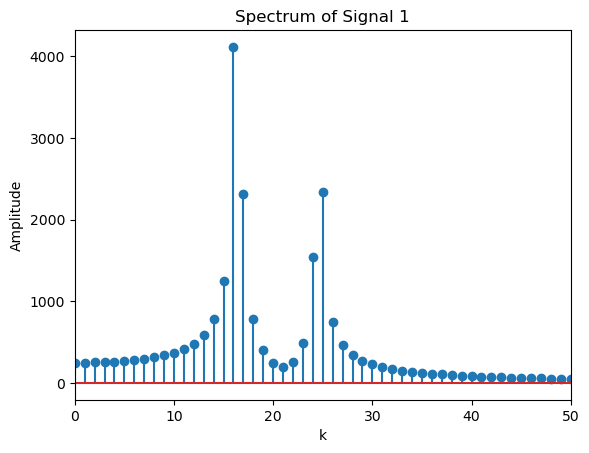

FFT time: 0.05623507499694824 seconds


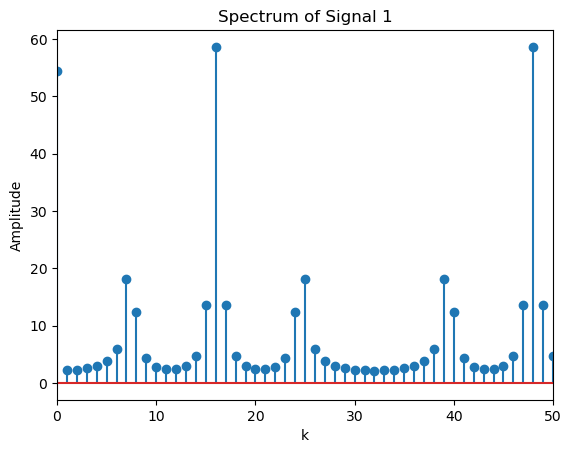

In [ ]:
# create the signal 1
srate1  = 1000 # hz
time1   = np.arange(0.,4.096,1/srate1) # time vector in seconds
pnts1   = len(time1) # number of time points
signal1 = 2.5 * np.sin( 2*np.pi*4*time1 ) + 1.5 * np.sin( 2*np.pi*6*time1 )

# DFT using dft() implementation
t = time.time()
X_signal1_DFT = dft(signal1)
print(f'DFT time: {time.time() - t} seconds')

# plot DFT
fig1 = plt.figure(1)
plt.stem(abs(X_signal1_DFT))
plt.xlabel('k'), plt.ylabel('Amplitude')
plt.xlim(0,50)
plt.title('Spectrum of Signal 1')
plt.show()

# DFT using fft() implementation
t = time.time()
X_signal1_FFT = fft(signal1)
print(f'FFT time: {time.time() - t} seconds')

# plot FFT
fig1 = plt.figure(1)
plt.stem(abs(X_signal1_FFT))
plt.xlabel('k'), plt.ylabel('Amplitude')
plt.xlim(0,50)
plt.title('Spectrum of Signal 1')
plt.show()


## Part 4: Effects of Window Size

Assume you sample from the following continuous time signal
$$x(t) = 10\cos(2\pi f_A t) + \frac{1}{10}\cos(2\pi f_B t)$$
with
* $f_A = 17$ Hz
* $f_B = 34$ Hz

The sampling frequency is $f_s = 100$ Hz.

### Assignment 4a:

1. Compute the normalized frequencies $\omega_A$ and $\omega_B$ corresponding to the frequencies $f_A$ and $f_B$.
2. Compute and plot the FFT of $x[n] = x_A[n] +x_B[n] $ for two different window length $N_1 = 256$ and $N_2 = 200$. Note that for $N_1$ you can use the FFT function you implemented earlier. However, since $N_2$ is not a power of 2 you have to either use the DFT function or make use of numpy's FFT function ``np.fft.fft()``. For plotting the FFTs use the ``plot_dft()`` function. Scale the x-axis to a range of $[\omega_A - 0.2, \omega_B + 0.2]$

In [ ]:
fs = 100 #sampling frequency
fA = 17
fB = 22

N1 = 256
N2 = 200

# TODO: compute normalized frequencies
# Recall that the relation between the normalized frequency and the natural frequency is ω = 2πf/fs
omegaA = ((2 * np.pi * fA) / fs)
omegaB = ((2 * np.pi * fB) / fs)

# TODO: create DT signal xN1 (x[n] with length N1) and xN2 (x[n] with length N2):
#Individual signal components with length N1
t1   = np.linspace(0, (N1 - 1)/fs, N1)
xAN1 = 10 * np.cos(2 * np.pi * fA * t1)
xBN1 = .1 * np.cos(2 * np.pi * fB * t1)

#Individual signal components with length N2
t2   = np.linspace(0, (N2 - 1)/fs, N2)
xAN2 = 10 * np.cos(2 * np.pi * fA * t2)
xBN2 = .1 * np.cos(2 * np.pi * fB * t2)

# TODO: compute FFTs
XN1 = np.fft.ftt(xAN1 + xBN1)
XN2 = np.fft.ftt(xAN2 + xAN2)

# TODO: plot magnitude of FFT of xN1
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(211)
plot_dft(XN1, 'dB')
plt.xscale(omegaA - 0.2, omegaB + 0.2)


# TODO: plot magnitude of FFT of xN2
plt.subplot(212)
plot_dft(XN2, 'dB')
plt.xscale(omegaA - 0.2, omegaB + 0.2)

fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

**Discussion:** Why do the FFTs for the two different window length look so different? Hint: The plots you have generated for Assignment 2 might be helpful for answering this question.

**Solution:** Window length is from the length of the signal and is therefore dependent on the fundamental frequency. This can change the graphs' appearance due to the 

### Assignment 4b:

1. Create a plot that contains
* the DTFT of $x_A[n]$ using window length $N_1$,
* the DTFT of $x_B[n]$ using window length $N_1$,
* the FFT of $x[n]$ using window length $N_1$,
When computing the DTFTs, chose a $K$ of at least 4001. Scale the x-axis to a range of $[\omega_A - 0.2, \omega_B + 0.2]$
2. Repeat the above with $N_2$ instead of $N_1$.


In [ ]:
K = 4001 # number of frequency points for sampling the DTFT

# TODO: DTFTs of xA and xB using window length N1
XAN1_DTFT = dtft(xAN1, K)
XBN1_DTFT = dtft(xBN1, K)

# TODO: DTFTs of xA and xB using window length N2
XAN2_DTFT = dtft(xAN2, K)
XBN2_DTFT = dtft(xBN2, K)

# TODO: Plot DTFTs of xA and xB, as well as FFT of x using window length N1
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(211)
plot_dtft(XAN1_DTFT, 'dB', 'Red')
plot_dtft(XBN1_DTFT, 'dB', 'Blue')
plot_dft(XN1, 'dB')
plt.xscale(omegaA - 0.2, omegaB + 0.2)

# TODO: Plot DTFTs of xA and xB, as well as FFT of x using window length N2
plt.subplot(212)
plot_dtft(XAN2_DTFT, 'dB', 'Red')
plot_dtft(XBN2_DTFT, 'dB', 'Blue')
plot_dft(XN2, 'dB')
plt.xscale(omegaA - 0.2, omegaB + 0.2)

fig.tight_layout()
plt.show()

**Discussion:** Based on the plots, which window length is better suited for detecting the two components $x_A[n]$ and $x_B[n]$ from the FFT of the signal $x[n]$?

**Solution:** N2, based on the plots.